
Project_YoutubeVideoStatistics


In [1]:
# Layout of mypart2.ipynb of the team project:

# Dependancies
# Gettiing to know the data
# Cleaning data
# Analysis of Relationship
# Visualization 

# Initial areas of interest:

# What channels are most popular/gitting mor likes
# What publish_time got most likes
# Views visualized
#likes/channels/published times

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
import seaborn as sns

# data files
dataset_path = "../Resources/USvideos.csv"
# results_path = "../Resources/Project_results.csv"

# Read the data 
data_df = pd.read_csv(dataset_path)

data_df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...


Gettiing to know the data





In [3]:
data_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

In [4]:
data_df.shape

(40949, 16)

In [5]:
#number of videos in the set
video_count =len(data_df["video_id"].value_counts())
print(f"Total number of unique videos (by value_id) in the dataset is {video_count}.")


Total number of unique videos (by value_id) in the dataset is 6351.


In [6]:
#statistical summary of numerical columns
data_df.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


In [7]:
#categories
data_df.describe(include=np.object)

,video_id,trending_date,title,channel_title,publish_time,tags,thumbnail_link,description
count,40949,40949,40949,40949,40949,40949,40949,40379
unique,6351,205,6455,2207,6269,6055,6352,6901
top,j4KvrAUjn6c,18.22.04,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,ESPN,2018-05-18T14:00:04.000Z,[none],https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,► Listen LIVE: http://power1051fm.com/\n► Face...
freq,30,200,30,203,50,1535,30,58


In [8]:
#columns and their data types
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
video_id                  40949 non-null object
trending_date             40949 non-null object
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null int64
publish_time              40949 non-null object
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40379 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.2+ MB


In [9]:
data_df.nunique()

video_id                   6351
trending_date               205
title                      6455
channel_title              2207
category_id                  16
publish_time               6269
tags                       6055
views                     40478
likes                     29850
dislikes                   8516
comment_count             13773
thumbnail_link             6352
comments_disabled             2
ratings_disabled              2
video_error_or_removed        2
description                6901
dtype: int64

In [10]:
#check unique column video_id
data_df['video_id'].unique()

array(['2kyS6SvSYSE', '1ZAPwfrtAFY', '5qpjK5DgCt4', ..., '6h8QgZF5Qu4',
       'mpnshdmtE2Y', 'yz7Xq3T0YPs'], dtype=object)

In [11]:
#check unique column 
data_df['publish_time'].unique()

array(['2017-11-13T17:13:01.000Z', '2017-11-13T07:30:00.000Z',
       '2017-11-12T19:05:24.000Z', ..., '2018-06-13T05:27:27.000Z',
       '2018-06-12T16:03:58.000Z', '2018-06-13T09:00:06.000Z'],
      dtype=object)

Cleaning Data

In [12]:
#check for Null values
data_df.isnull().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64

In [13]:
# can drop columns that dont need
#new_df = data_sd.drop([" ", " ", " ", " "], axis=1)

In [25]:
#remove duplicates
# data_df = data_df.drop_duplicates() runs the same number as withhout param
data_df = data_df.drop_duplicates(subset=None, keep='first', inplace=False)
data_df.shape


(40901, 16)

In [6]:
#create clean_df with columns of interest instead of dropping

clean_df = data_df[['video_id','views','likes', 'dislikes','channel_title','publish_time']]
clean_df

,video_id,views,likes,dislikes,channel_title,publish_time
0,2kyS6SvSYSE,748374,57527,2966,CaseyNeistat,2017-11-13T17:13:01.000Z
1,1ZAPwfrtAFY,2418783,97185,6146,LastWeekTonight,2017-11-13T07:30:00.000Z
2,5qpjK5DgCt4,3191434,146033,5339,Rudy Mancuso,2017-11-12T19:05:24.000Z
3,puqaWrEC7tY,343168,10172,666,Good Mythical Morning,2017-11-13T11:00:04.000Z
4,d380meD0W0M,2095731,132235,1989,nigahiga,2017-11-12T18:01:41.000Z
...,...,...,...,...,...,...
40944,BZt0qjTWNhw,1685609,38160,1385,AaronsAnimals,2018-05-18T13:00:04.000Z
40945,1h7KV2sjUWY,1064798,60008,382,zefrank1,2018-05-18T01:00:06.000Z
40946,D6Oy4LfoqsU,1066451,48068,1032,Brad Mondo,2018-05-18T17:34:22.000Z
40947,oV0zkMe1K8s,5660813,192957,2846,How It Should Have Ended,2018-05-17T17:00:04.000Z


Analysis of Relationship and Visualization

In [6]:

pop_channel= pd.DataFrame(clean_df.groupby(['channel_title']).sum()["likes"])

pop_channel = pop_channel.reset_index()

pop_channel = pop_channel.sort_values(by =["likes"], ascending=False)

pop_channel.head(20)

,channel_title,likes
2094,ibighit,199247121
358,ChildishGambinoVEVO,96700818
541,Dude Perfect,60275557
1129,Marvel Entertainment,55873344
110,ArianaGrandeVevo,52170970
2112,jypentertainment,44900910
1702,TaylorSwiftVEVO,39292840
561,Ed Sheeran,39279211
2015,ZaynVEVO,31695245
1054,Logan Paul Vlogs,31545290


In [7]:
pop_channel = pop_channel.iloc[:15,:]
pop_channel

,channel_title,likes
2094,ibighit,199247121
358,ChildishGambinoVEVO,96700818
541,Dude Perfect,60275557
1129,Marvel Entertainment,55873344
110,ArianaGrandeVevo,52170970
2112,jypentertainment,44900910
1702,TaylorSwiftVEVO,39292840
561,Ed Sheeran,39279211
2015,ZaynVEVO,31695245
1054,Logan Paul Vlogs,31545290


In [8]:
disl_channel= pd.DataFrame(clean_df.groupby(['channel_title']).sum()["dislikes"])

disl_channel = disl_channel.reset_index()

disl_channel = disl_channel.sort_values(by =["dislikes"], ascending=False)

disl_channel.head(20)

,channel_title,dislikes
1054,Logan Paul Vlogs,13847251
2010,YouTube Spotlight,10924092
358,ChildishGambinoVEVO,6054434
307,Call of Duty,5644083
2094,ibighit,3467306
2112,jypentertainment,2482131
1702,TaylorSwiftVEVO,2127542
110,ArianaGrandeVevo,1931230
1107,MalumaVEVO,1757948
946,KatyPerryVEVO,1669622


In [9]:
disl_channel = disl_channel.iloc[:15,:]
disl_channel

,channel_title,dislikes
1054,Logan Paul Vlogs,13847251
2010,YouTube Spotlight,10924092
358,ChildishGambinoVEVO,6054434
307,Call of Duty,5644083
2094,ibighit,3467306
2112,jypentertainment,2482131
1702,TaylorSwiftVEVO,2127542
110,ArianaGrandeVevo,1931230
1107,MalumaVEVO,1757948
946,KatyPerryVEVO,1669622


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

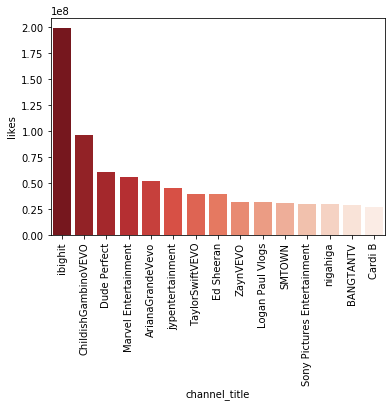

In [15]:
#most liked channel
ax = sns.barplot(x="channel_title", y="likes", data=pop_channel,
                 palette=("Reds_r"))
plt.xticks (rotation=90)



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

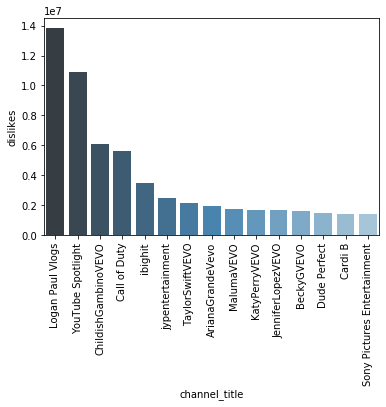

In [16]:
#most disliked channel
ax = sns.barplot(x="channel_title", y="dislikes", data=disl_channel,
                 palette=("Blues_d"))
plt.xticks (rotation=90)

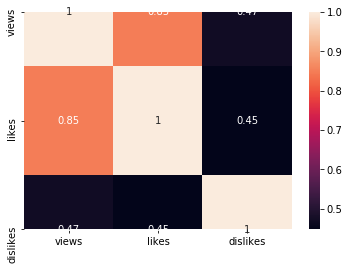

In [22]:
#correlation matrix between variables 
corelation = clean_df.corr()
# plt.figure(figsize=(10, 6))
# akws = {“ha”: ‘left’,”va”: ‘top’}
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=True, annot_kws={'size':10})


In [18]:
# columns = ["views", "likes", "dislikes"]
# corr_matrix = clean_df[columns].corr()
# corr_matrix

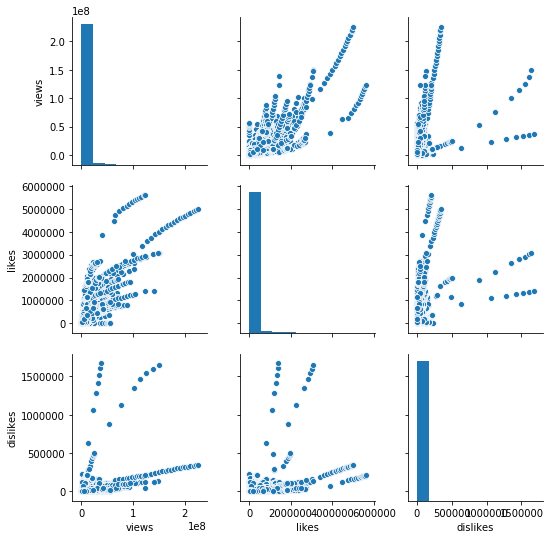

In [20]:
#relationship between two variables

sns.pairplot(clean_df)
# sns.pairplot(clean_df,hue="views")

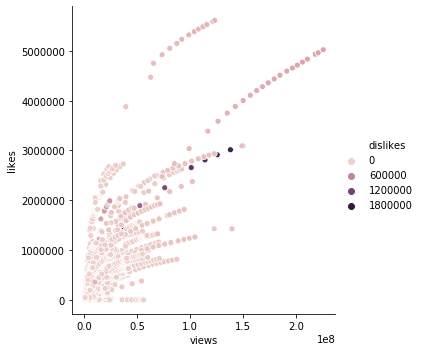

In [16]:
#scatterplot views vs likes
sns.relplot(x="views", y="likes", hue="dislikes", data=clean_df)

In [19]:
# #scatterplot 
# sns.relplot(x="views", y="likes" ,hue="publish_date", data=clean_df)
# sns.set(style="darkgrid")
#sns.relplot(x="views", y="likes" ,hue="publish_date",size="size", sizes=(15, 200), data=clean_df)



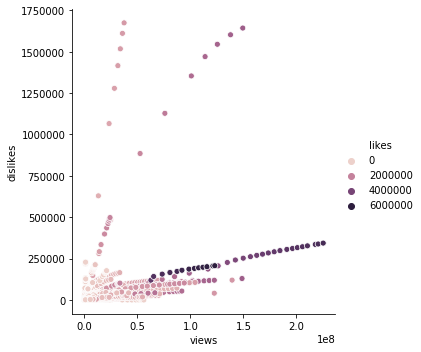

In [53]:
#scatterplot 
sns.relplot(x="views", y="dislikes" ,hue="likes", data=clean_df)

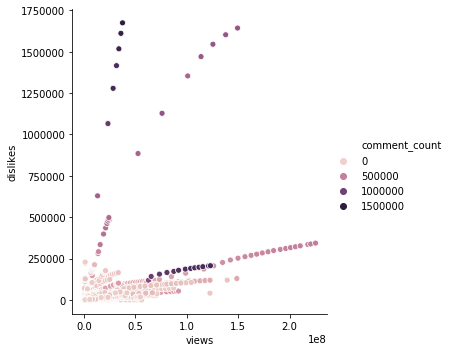

In [25]:
# #scatterplot 
sns.relplot(x="views", y="dislikes" ,hue="comment_count", data=data_df)

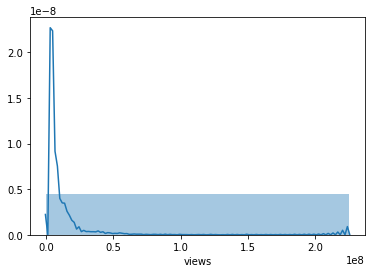

In [18]:
#histogram for ranges

sns.distplot(clean_df['views'], bins=1)


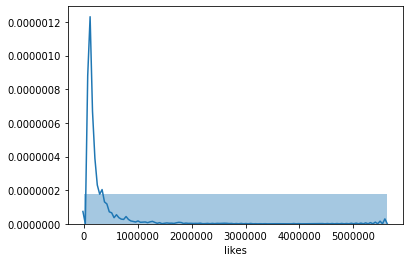

In [32]:
#histogram for ranges

sns.distplot(clean_df['likes'], bins=1)

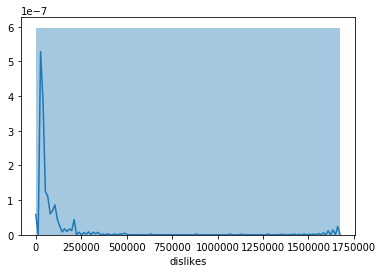

In [37]:
#histogram for ranges

sns.distplot(data_df['dislikes'], bins=1)

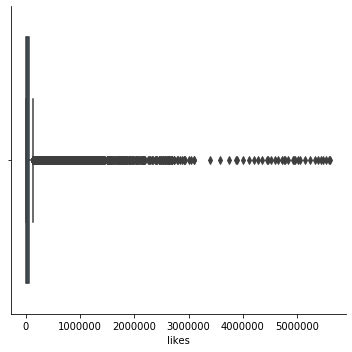

In [38]:
sns.catplot(x='likes', kind='box',data= clean_df)

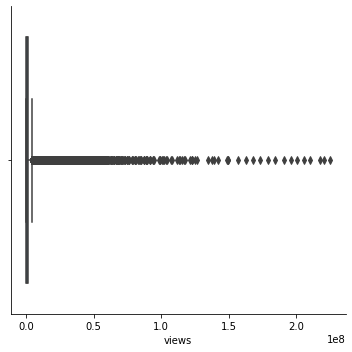

In [39]:
sns.catplot(x='views', kind='box',data= clean_df)

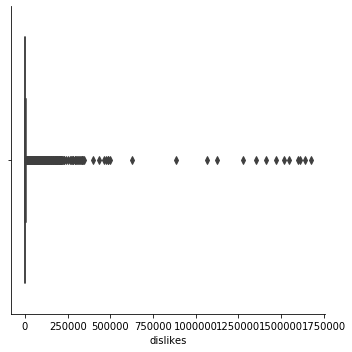

In [40]:
sns.catplot(x='dislikes', kind='box',data= clean_df)

In [54]:
# # plt.bar(clean_df['views'],clean_df['likes'], clean_df['dislikes'])
# plt.bar(clean_df['views'],clean_df['likes'])


In [ ]:
# #to understand the distribution                      
# clean_df.boxplot(column= 'views', by='likes')

In [ ]:
# #matplotlib
# clean_df['views'].hist(bins=10)

In [ ]:
# #sort clean-df by views
# clean_df_sorted_views = clean_df.sort_values('views', ascending=False)
# clean_df_sorted_views.head()

In [ ]:
# # Generate a bar plot showing 
# #pass 2 col???
# count = clean_df['likes','views'].value_counts()

# count.plot(kind="bar")
# plt.ylabel("likes")
# plt.xlabel("views")

# plt.show()
# count

In [ ]:
# #most liked videos
# most_liked = clean_df['views'].max()
# most_liked

In [ ]:
# #top 20 most liked channels vs likes
# clean_df('channel_title', 'likes')
# clean_df.head(20)

In [ ]:
# #top 20 most liked channels vs veiws
# clean_df('channel_title', 'views')
# clean_df.head(20)

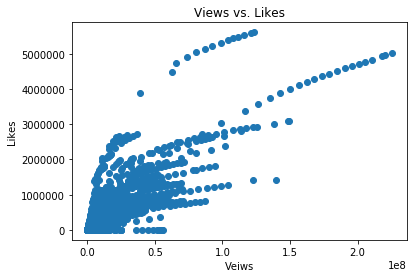

In [27]:
# Plot View versus likes            
x_values = clean_df["views"]
y_values = clean_df['likes']
plt.scatter(x_values,y_values)
plt.title("Views vs. Likes")
plt.xlabel('Veiws')
plt.ylabel('Likes')
# plt.savefig("output_data/views_vs_likes.png")
plt.show()


In [29]:
# Create a function to create Linear Regression plots

def linearplot(x_values,y_values,y_label, coor):
    

    print(f"The r-squared is: {round(st.pearsonr(x_values, y_values)[0],2)}")
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,coor,fontsize=15,color="red")
 
    plt.xlabel('Views')
    plt.ylabel(y_label)

The r-squared is: 0.85


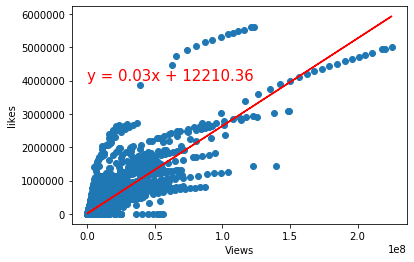

In [37]:
x_values= clean_df["views"]
y_values= clean_df["likes"]
linearplot(x_values, y_values, "likes", (1.5,4000000))

plt.savefig("output_data/views_vs_likes.png")
plt.show()

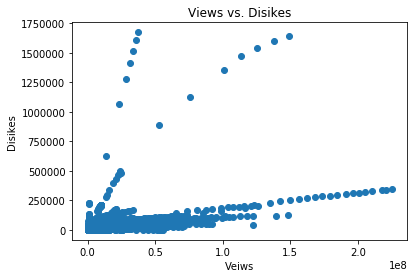

In [7]:
# Plot View versus likes            
x_values = clean_df["views"]
y_values = clean_df['dislikes']
plt.scatter(x_values,y_values)
plt.title("Views vs. Disikes")
plt.xlabel('Veiws')
plt.ylabel('Disikes')
plt.savefig("output_data/views_vs_dislikes.png")
plt.show()

In [10]:
# Create a function to create Linear Regression plots

def linearplot(x_values,y_values,y_label, coor):
    

    print(f"The r-squared is: {round(st.pearsonr(x_values, y_values)[0],2)}")
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,coor,fontsize=15,color="red")
 
    plt.xlabel('Views')
    plt.ylabel(y_label)

The r-squared is: 0.47


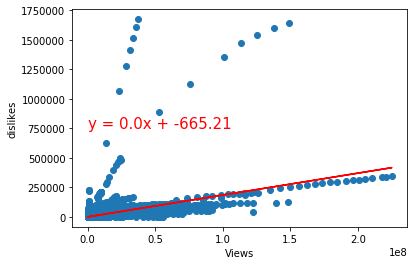

In [14]:
x_values= clean_df["views"]
y_values= clean_df["dislikes"]
linearplot(x_values, y_values, "dislikes", (10,750000))

plt.savefig("output_data/views_vs_likes.png")
plt.show()

In [ ]:
Analysis:
    
    
    
    
    